## Description of Notebook

The notebook is used to test ML approach on the VDF statistical momentsa, anisotropies, and particle numbers for species

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

## Test 1. Some standard classifiers.

In [23]:
featurevector_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_moments.npy')
labels_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_labels.npy')
times_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_timep.npy')
print('The total number of data points is: ' + str(len(labels_allmoments)))
print('Among them unstable (positive) samples: ' + str(len(np.where(labels_allmoments == 1)[0])))

The total number of data points is: 997
Among them unstable (positive) samples: 392


In [24]:
scaler = StandardScaler()
scaler.fit(featurevector_allmoments)
featurevector_allmoments = scaler.transform(featurevector_allmoments)

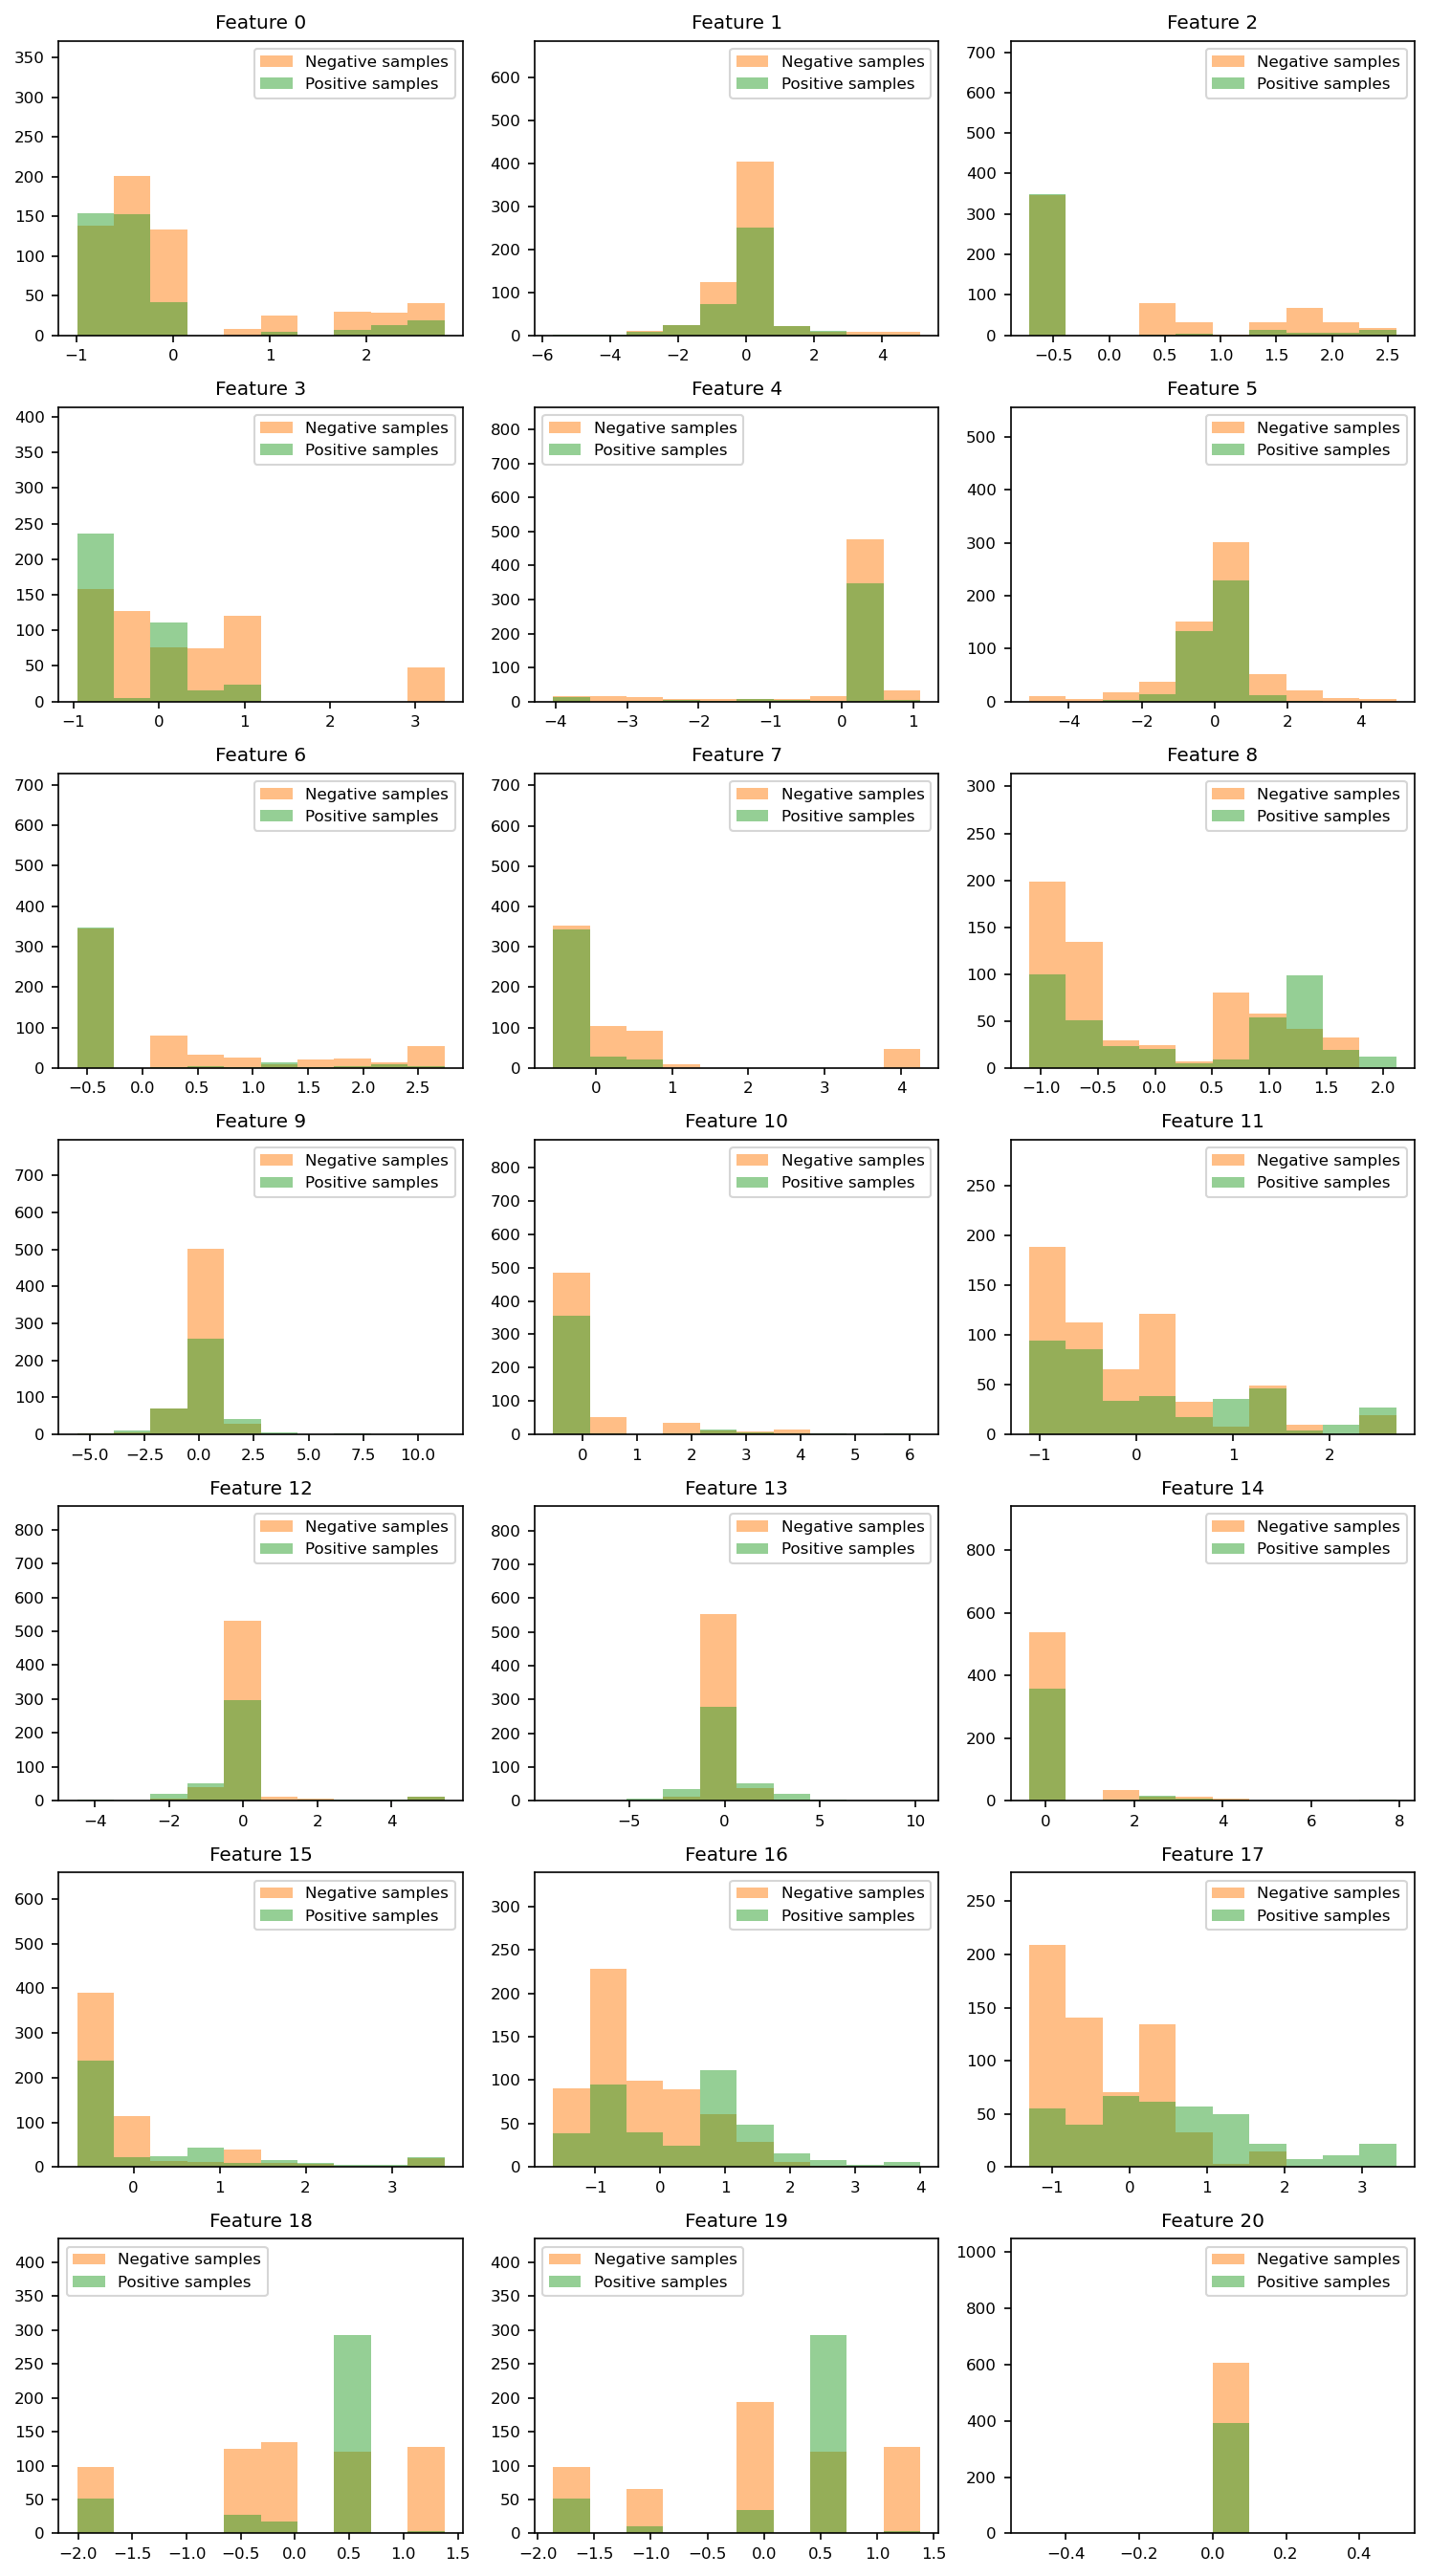

In [25]:
index_0 = np.where(labels_allmoments == 0)[0]
index_1 = np.where(labels_allmoments == 1)[0]

matplotlib.rcParams.update({'font.size':8})
im, ax = plt.subplots(7, 3, figsize = (10, 18), dpi=150)
for i in range (0, 7, 1):
    for j in range (0, 3, 1):
        hist, bins, patches = ax[i,j].hist(featurevector_allmoments[:,i*3+j], bins=10, alpha=0.00)
        ax[i,j].hist(featurevector_allmoments[index_0,i*3+j], bins=bins, label='Negative samples', alpha=0.50)
        ax[i,j].hist(featurevector_allmoments[index_1,i*3+j], bins=bins, label='Positive samples', alpha=0.50)
        ax[i,j].set(title='Feature '+str(i*3+j))
        ax[i,j].legend()

plt.tight_layout()
plt.show()

In [26]:
def outputclass_analysis(test_labels, predicted_labels, output_score=''):
    tn, fp, fn, tp = confusion_matrix(test_labels, predicted_labels).ravel()
    print("------------ SUMMARY OF CLASSIFICATION RESULTS ----------------")
    print("TP = "+str(tp))
    print("TN = "+str(tn))
    print("FP = "+str(fp))
    print("FN = "+str(fn))
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    acc = (tp+tn)/(tp+fn+fp+tn)
    tss = tp/(tp+fn) - fp/(fp+tn)
    hss = 2*(tp*tn - fp*fn)/((tp+fn)*(fn+tn) + (tp+fp)*(fp+tn))
    print("Precision = "+str(precision))
    print("Recall = "+str(recall))
    print("Accuracy = "+str(acc))
    print("TSS = "+str(tss))
    print("HSS = "+str(hss))
    if (output_score == 'TSS'): return tss
    if (output_score == 'HSS'): return hss
    if (output_score == 'precision'): return precision
    if (output_score == 'accuracy'): return acc
    return

In [27]:
X_train, X_test, f_train, f_test = train_test_split(featurevector_allmoments, labels_allmoments, test_size=0.33, random_state=1)

K-Nearest Neighbor approach (see n_neighbors = 1 case, which is very interesting)

In [28]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, f_train)
f_predicted = clf.predict(X_test)
outputclass_analysis(f_test, f_predicted)

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 105
TN = 188
FP = 15
FN = 22
Precision = 0.875
Recall = 0.8267716535433071
Accuracy = 0.8878787878787879
TSS = 0.7528800279275435
HSS = 0.7607289829512052


An SVM with the weight balancing setup

In [29]:
clf = SVC(kernel='rbf', class_weight='balanced')
clf.fit(X_train, f_train)
f_predicted = clf.predict(X_test)
outputclass_analysis(f_test, f_predicted)

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 108
TN = 170
FP = 33
FN = 19
Precision = 0.7659574468085106
Recall = 0.8503937007874016
Accuracy = 0.8424242424242424
TSS = 0.6878321244327218
HSS = 0.6739254360962262


A very simple neural network with the hidden layer size of 50

In [30]:
clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=10000, tol=1e-6)
clf.fit(X_train, f_train)
f_predicted = clf.predict(X_test)
outputclass_analysis(f_test, f_predicted)

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 114
TN = 193
FP = 10
FN = 13
Precision = 0.9193548387096774
Recall = 0.8976377952755905
Accuracy = 0.9303030303030303
TSS = 0.8483767115317481
HSS = 0.852144777340554


Random forest

In [32]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, f_train)
f_predicted = clf.predict(X_test)
outputclass_analysis(f_test, f_predicted)

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 118
TN = 198
FP = 5
FN = 9
Precision = 0.959349593495935
Recall = 0.9291338582677166
Accuracy = 0.9575757575757575
TSS = 0.9045033163957954
HSS = 0.9098677279644153


## Test 2. Separation into chunks of data.

In [33]:
featurevector_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_moments.npy')
labels_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_labels.npy')
times_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_timep.npy')
print('The total number of data points is: ' + str(len(labels_allmoments)))
print('Among them unstable (positive) samples: ' + str(len(np.where(labels_allmoments == 1)[0])))

The total number of data points is: 997
Among them unstable (positive) samples: 392


In [34]:
scaler = StandardScaler()
scaler.fit(featurevector_allmoments)
featurevector_allmoments = scaler.transform(featurevector_allmoments)

In [35]:
def separate_chunksizebased(featurevector_allmoments, labels_allmoments, chunksize):

    X_train = []
    X_test = []
    f_train = []
    f_test = []

    mode = 'train'
    for i in range (0, len(labels_allmoments), chunksize):
        _chunksize = chunksize
        if (i + chunksize > len(labels_allmoments)): _chunksize = len(labels_allmoments) - i
        if (mode == 'train'):
            for j in range (0, _chunksize, 1):
                X_train.append(featurevector_allmoments[i+j,:])
                f_train.append(labels_allmoments[i+j])
            mode = 'test'
            continue
        if (mode == 'test'):
            for j in range (0, _chunksize, 1):
                X_test.append(featurevector_allmoments[i+j,:])
                f_test.append(labels_allmoments[i+j])
            mode = 'train'
            continue

    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    f_train = np.array(f_train, dtype=float)
    f_test = np.array(f_test, dtype=float)
    
    print("The size of the chunk:", chunksize)
    print("Number of positive - negative samples in train: " + str(np.sum(f_train)) + " --- " + str(len(f_train)-np.sum(f_train)))
    print("Number of positive - negative samples in test: " + str(np.sum(f_test)) + " --- " + str(len(f_test)-np.sum(f_test)))
    
    return X_train, X_test, f_train, f_test

output_scores = []
chunksizes = np.arange(2, 102, 2)

for chunksize in chunksizes:
    X_train, X_test, f_train, f_test = separate_chunksizebased(featurevector_allmoments, labels_allmoments, chunksize)
    clf = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', max_iter=10000)
    clf.fit(X_train, f_train)
    f_predicted = clf.predict(X_test)
    output_scores.append(outputclass_analysis(f_test, f_predicted, output_score='accuracy'))

The size of the chunk: 2
Number of positive - negative samples in train: 197.0 --- 302.0
Number of positive - negative samples in test: 195.0 --- 303.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 173
TN = 285
FP = 18
FN = 22
Precision = 0.9057591623036649
Recall = 0.8871794871794871
Accuracy = 0.9196787148594378
TSS = 0.8277735465854277
HSS = 0.8308107832645365
The size of the chunk: 4
Number of positive - negative samples in train: 201.0 --- 299.0
Number of positive - negative samples in test: 191.0 --- 306.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 167
TN = 284
FP = 22
FN = 24
Precision = 0.8835978835978836
Recall = 0.8743455497382199
Accuracy = 0.9074446680080482
TSS = 0.8024501249016186
HSS = 0.8040321612864515
The size of the chunk: 6
Number of positive - negative samples in train: 186.0 --- 313.0
Number of positive - negative samples in test: 206.0 --- 292.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 1

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 132
TN = 237
FP = 66
FN = 49
Precision = 0.6666666666666666
Recall = 0.7292817679558011
Accuracy = 0.762396694214876
TSS = 0.5114599857775833
HSS = 0.5019685039370079
The size of the chunk: 46
Number of positive - negative samples in train: 206.0 --- 300.0
Number of positive - negative samples in test: 186.0 --- 305.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 95
TN = 239
FP = 66
FN = 91
Precision = 0.5900621118012422
Recall = 0.510752688172043
Accuracy = 0.6802443991853361
TSS = 0.2943592455490922
HSS = 0.3022853781056252
The size of the chunk: 48
Number of positive - negative samples in train: 183.0 --- 334.0
Number of positive - negative samples in test: 209.0 --- 271.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 125
TN = 237
FP = 34
FN = 84
Precision = 0.7861635220125787
Recall = 0.5980861244019139
Accuracy = 0.7541666666666667
TSS = 0.4726248697893678
HSS = 0.485

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 85
TN = 211
FP = 84
FN = 89
Precision = 0.5029585798816568
Recall = 0.4885057471264368
Accuracy = 0.6311300639658849
TSS = 0.20375998441457238
HSS = 0.204967909460585
The size of the chunk: 90
Number of positive - negative samples in train: 202.0 --- 338.0
Number of positive - negative samples in test: 190.0 --- 267.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 128
TN = 176
FP = 91
FN = 62
Precision = 0.5844748858447488
Recall = 0.6736842105263158
Accuracy = 0.6652078774617067
TSS = 0.3328602404888626
HSS = 0.3256921875150685
The size of the chunk: 92
Number of positive - negative samples in train: 208.0 --- 329.0
Number of positive - negative samples in test: 184.0 --- 276.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 135
TN = 131
FP = 145
FN = 49
Precision = 0.48214285714285715
Recall = 0.7336956521739131
Accuracy = 0.5782608695652174
TSS = 0.20833333333333337
HSS = 

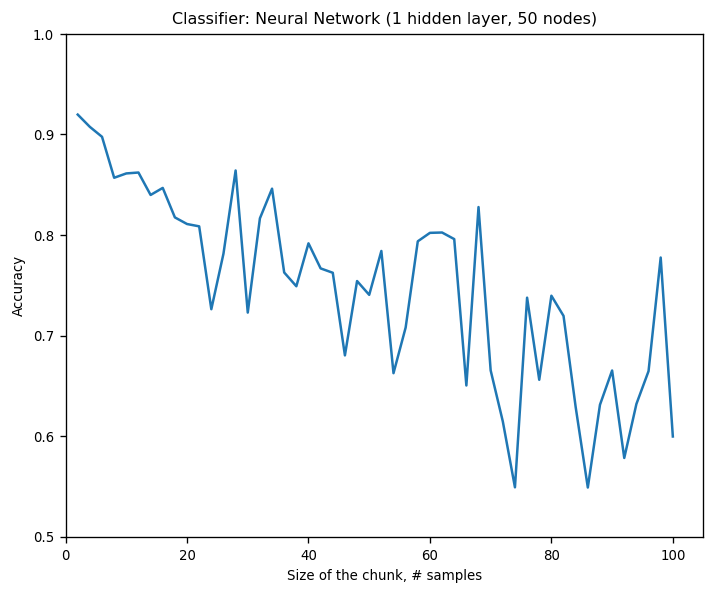

In [36]:
im, ax = plt.subplots(1, 1, figsize=(6,5), dpi=120)
ax.plot(chunksizes, output_scores)
ax.set(xlim=[0.0,105.0], ylim=[0.5,1.0], xlabel='Size of the chunk, # samples', ylabel='Accuracy', \
       title='Classifier: Neural Network (1 hidden layer, 50 nodes)')
plt.tight_layout()
plt.show()

In [37]:
def separate_chunksizebased(featurevector_allmoments, labels_allmoments, chunksize):

    X_train = []
    X_test = []
    f_train = []
    f_test = []

    mode = 'train'
    for i in range (0, len(labels_allmoments), chunksize):
        _chunksize = chunksize
        if (i + chunksize > len(labels_allmoments)): _chunksize = len(labels_allmoments) - i
        if (mode == 'train'):
            for j in range (0, _chunksize, 1):
                X_train.append(featurevector_allmoments[i+j,:])
                f_train.append(labels_allmoments[i+j])
            mode = 'test'
            continue
        if (mode == 'test'):
            for j in range (0, _chunksize, 1):
                X_test.append(featurevector_allmoments[i+j,:])
                f_test.append(labels_allmoments[i+j])
            mode = 'train'
            continue

    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    f_train = np.array(f_train, dtype=float)
    f_test = np.array(f_test, dtype=float)
    
    print("The size of the chunk:", chunksize)
    print("Number of positive - negative samples in train: " + str(np.sum(f_train)) + " --- " + str(len(f_train)-np.sum(f_train)))
    print("Number of positive - negative samples in test: " + str(np.sum(f_test)) + " --- " + str(len(f_test)-np.sum(f_test)))
    
    return X_train, X_test, f_train, f_test

output_scores = []
chunksizes = np.arange(2, 102, 2)

for chunksize in chunksizes:
    X_train, X_test, f_train, f_test = separate_chunksizebased(featurevector_allmoments, labels_allmoments, chunksize)
    clf = SVC(kernel='rbf', class_weight='balanced')
    clf.fit(X_train, f_train)
    f_predicted = clf.predict(X_test)
    output_scores.append(outputclass_analysis(f_test, f_predicted, output_score='accuracy'))

The size of the chunk: 2
Number of positive - negative samples in train: 197.0 --- 302.0
Number of positive - negative samples in test: 195.0 --- 303.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 169
TN = 257
FP = 46
FN = 26
Precision = 0.786046511627907
Recall = 0.8666666666666667
Accuracy = 0.8554216867469879
TSS = 0.7148514851485148
HSS = 0.7020194465220643
The size of the chunk: 4
Number of positive - negative samples in train: 201.0 --- 299.0
Number of positive - negative samples in test: 191.0 --- 306.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 167
TN = 259
FP = 47
FN = 24
Precision = 0.780373831775701
Recall = 0.8743455497382199
Accuracy = 0.8571428571428571
TSS = 0.7207507784963898
HSS = 0.7048026970728728
The size of the chunk: 6
Number of positive - negative samples in train: 186.0 --- 313.0
Number of positive - negative samples in test: 206.0 --- 292.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 173

The size of the chunk: 54
Number of positive - negative samples in train: 202.0 --- 309.0
Number of positive - negative samples in test: 190.0 --- 296.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 89
TN = 257
FP = 39
FN = 101
Precision = 0.6953125
Recall = 0.46842105263157896
Accuracy = 0.7119341563786008
TSS = 0.3366642958748222
HSS = 0.3575556143067568
The size of the chunk: 56
Number of positive - negative samples in train: 169.0 --- 335.0
Number of positive - negative samples in test: 223.0 --- 270.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 113
TN = 234
FP = 36
FN = 110
Precision = 0.7583892617449665
Recall = 0.5067264573991032
Accuracy = 0.7038539553752535
TSS = 0.37339312406576985
HSS = 0.3844982983017222
The size of the chunk: 58
Number of positive - negative samples in train: 174.0 --- 348.0
Number of positive - negative samples in test: 218.0 --- 257.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 116


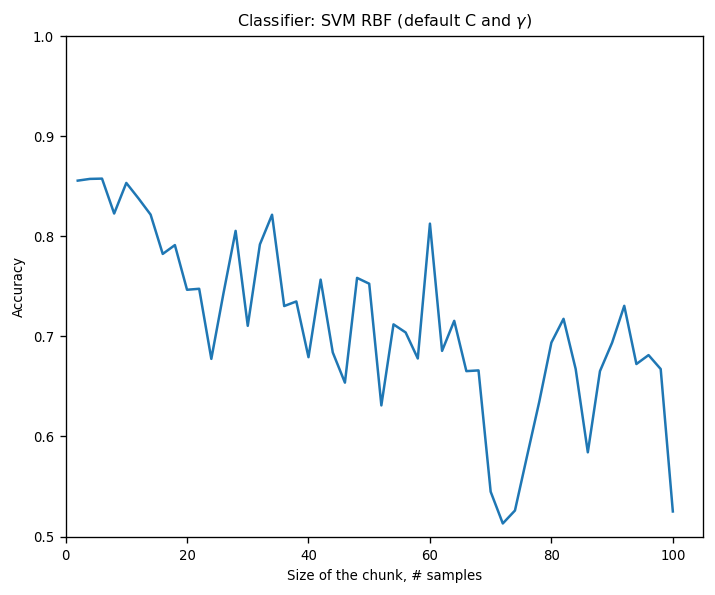

In [38]:
im, ax = plt.subplots(1, 1, figsize=(6,5), dpi=120)
ax.plot(chunksizes, output_scores)
ax.set(xlim=[0.0,105.0], ylim=[0.5,1.0], xlabel='Size of the chunk, # samples', ylabel='Accuracy', \
       title=r'Classifier: SVM RBF (default C and $\gamma$)')
plt.tight_layout()
plt.show()

In [39]:
def separate_chunksizebased(featurevector_allmoments, labels_allmoments, chunksize):

    X_train = []
    X_test = []
    f_train = []
    f_test = []

    mode = 'train'
    for i in range (0, len(labels_allmoments), chunksize):
        _chunksize = chunksize
        if (i + chunksize > len(labels_allmoments)): _chunksize = len(labels_allmoments) - i
        if (mode == 'train'):
            for j in range (0, _chunksize, 1):
                X_train.append(featurevector_allmoments[i+j,:])
                f_train.append(labels_allmoments[i+j])
            mode = 'test'
            continue
        if (mode == 'test'):
            for j in range (0, _chunksize, 1):
                X_test.append(featurevector_allmoments[i+j,:])
                f_test.append(labels_allmoments[i+j])
            mode = 'train'
            continue

    X_train = np.array(X_train, dtype=float)
    X_test = np.array(X_test, dtype=float)
    f_train = np.array(f_train, dtype=float)
    f_test = np.array(f_test, dtype=float)
    
    print("The size of the chunk:", chunksize)
    print("Number of positive - negative samples in train: " + str(np.sum(f_train)) + " --- " + str(len(f_train)-np.sum(f_train)))
    print("Number of positive - negative samples in test: " + str(np.sum(f_test)) + " --- " + str(len(f_test)-np.sum(f_test)))
    
    return X_train, X_test, f_train, f_test

output_scores = []
chunksizes = np.arange(2, 102, 2)

for chunksize in chunksizes:
    X_train, X_test, f_train, f_test = separate_chunksizebased(featurevector_allmoments, labels_allmoments, chunksize)
    clf = RandomForestClassifier(max_depth=10, random_state=0)
    clf.fit(X_train, f_train)
    f_predicted = clf.predict(X_test)
    output_scores.append(outputclass_analysis(f_test, f_predicted, output_score='accuracy'))

The size of the chunk: 2
Number of positive - negative samples in train: 197.0 --- 302.0
Number of positive - negative samples in test: 195.0 --- 303.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 179
TN = 299
FP = 4
FN = 16
Precision = 0.9781420765027322
Recall = 0.9179487179487179
Accuracy = 0.9598393574297188
TSS = 0.9047473978167047
HSS = 0.9147800195081883
The size of the chunk: 4
Number of positive - negative samples in train: 201.0 --- 299.0
Number of positive - negative samples in test: 191.0 --- 306.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 173
TN = 298
FP = 8
FN = 18
Precision = 0.9558011049723757
Recall = 0.9057591623036649
Accuracy = 0.9476861167002012
TSS = 0.8796153714539917
HSS = 0.8883551346961345
The size of the chunk: 6
Number of positive - negative samples in train: 186.0 --- 313.0
Number of positive - negative samples in test: 206.0 --- 292.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 177

The size of the chunk: 46
Number of positive - negative samples in train: 206.0 --- 300.0
Number of positive - negative samples in test: 186.0 --- 305.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 121
TN = 295
FP = 10
FN = 65
Precision = 0.9236641221374046
Recall = 0.6505376344086021
Accuracy = 0.8472505091649695
TSS = 0.6177507491627005
HSS = 0.6555675068980031
The size of the chunk: 48
Number of positive - negative samples in train: 183.0 --- 334.0
Number of positive - negative samples in test: 209.0 --- 271.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 138
TN = 237
FP = 34
FN = 71
Precision = 0.8023255813953488
Recall = 0.6602870813397129
Accuracy = 0.78125
TSS = 0.5348258267271668
HSS = 0.5458804872774454
The size of the chunk: 50
Number of positive - negative samples in train: 189.0 --- 311.0
Number of positive - negative samples in test: 203.0 --- 294.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 173
TN = 

The size of the chunk: 90
Number of positive - negative samples in train: 202.0 --- 338.0
Number of positive - negative samples in test: 190.0 --- 267.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 113
TN = 172
FP = 95
FN = 77
Precision = 0.5432692307692307
Recall = 0.5947368421052631
Accuracy = 0.6236323851203501
TSS = 0.23893159865957025
HSS = 0.23571164653948623
The size of the chunk: 92
Number of positive - negative samples in train: 208.0 --- 329.0
Number of positive - negative samples in test: 184.0 --- 276.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 119
TN = 195
FP = 81
FN = 65
Precision = 0.595
Recall = 0.6467391304347826
Accuracy = 0.6826086956521739
TSS = 0.35326086956521735
HSS = 0.3482142857142857
The size of the chunk: 94
Number of positive - negative samples in train: 214.0 --- 313.0
Number of positive - negative samples in test: 178.0 --- 292.0
------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 147
TN =

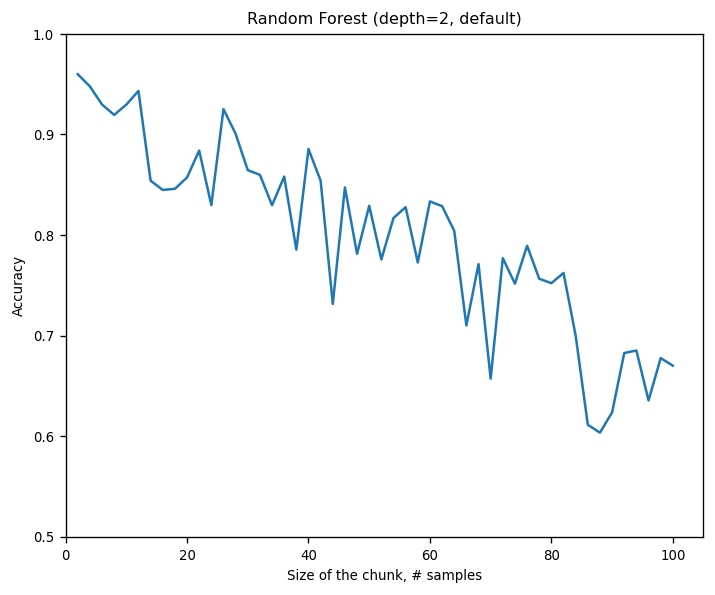

In [40]:
im, ax = plt.subplots(1, 1, figsize=(6,5), dpi=120)
ax.plot(chunksizes, output_scores)
ax.set(xlim=[0.0,105.0], ylim=[0.5,1.0], xlabel='Size of the chunk, # samples', ylabel='Accuracy', \
       title=r'Random Forest (depth=2, default)')
plt.tight_layout()
plt.show()

## Test 3. Treating the last three simulations as unknowns.

In [41]:
featurevector_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_moments.npy')
labels_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_labels.npy')
times_allmoments = np.load('./mldata_vdfmoments/allsimulations.mldata_timep.npy')
print('The total number of data points is: ' + str(len(labels_allmoments)))
print('Among them unstable (positive) samples: ' + str(len(np.where(labels_allmoments == 1)[0])))

The total number of data points is: 997
Among them unstable (positive) samples: 392


In [42]:
scaler = StandardScaler()
scaler.fit(featurevector_allmoments)
featurevector_allmoments = scaler.transform(featurevector_allmoments)

In [43]:
print(featurevector_allmoments.shape)
print(labels_allmoments.shape)

(997, 21)
(997,)


In [44]:
X_train = featurevector_allmoments[:-80,:]
X_test = featurevector_allmoments[-80:,:]
f_train = labels_allmoments[:-80]
f_test = labels_allmoments[-80:]

In [45]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(X_train, f_train)
f_predicted = clf.predict(X_test)
outputclass_analysis(f_test, f_predicted)

------------ SUMMARY OF CLASSIFICATION RESULTS ----------------
TP = 2
TN = 16
FP = 62
FN = 0
Precision = 0.03125
Recall = 1.0
Accuracy = 0.225
TSS = 0.20512820512820518
HSS = 0.012738853503184714
